# Paleo-Current Climate Study
A comparison of Atmospheric Surface Temperature (ATS) and CO2 for two time periods:
1. 800kyr to 50 yr BP (before present)
2. 1960 to 2019 AD 

The paleo-data are taken from the EPICA Dome C ice cores, and the current data are taken from NOAA reports.

### Required Files
- edc3_dt_jouzel2007.txt
- edc3_co2_composite.txt
 
### These data are taken from several different ice-core samples
- 0-22    kyr Dome C (Monnin et al. 2001) measured at University of Bern
- 22-393  kyr Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble
- 393-416 kyr Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble
- 416-664 kyr Dome C (Siegenthaler et al. 2005)  measured at University of Bern
- 664-800 kyr Dome C (Luethi et al. (sub)) measured at University of Bern


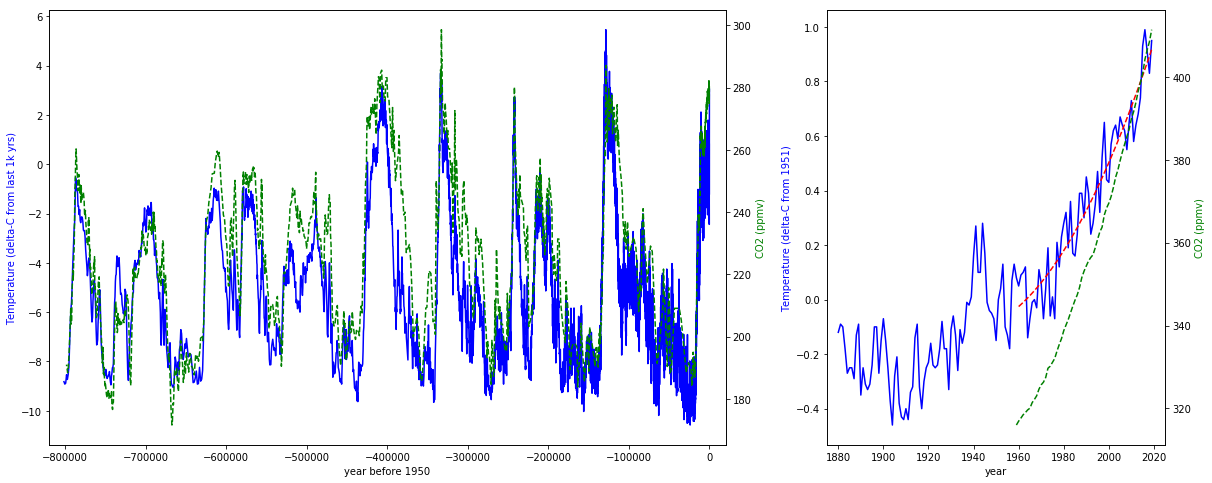

In [73]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
# set a large default for figure size
plt.rcParams["figure.figsize"] = (20,8)

#
ptmp_data = np.genfromtxt('edc3_dt_jouzel2007.txt',skip_header=75)
ptmp_age = -ptmp_data[:,2]
ptmp_deu = ptmp_data[:,3]
ptmp_t   = ptmp_data[:,4]

pco2_data = np.genfromtxt('edc3_co2_composite.txt',skip_header=108)
pco2_age = -pco2_data[:,0]
pco2_ppm = pco2_data[:,1]

ntmp_data = np.genfromtxt('noaa_temp_landsea_1880to2019.txt',skip_header=5)
ntmp_age = ntmp_data[:,0]
ntmp_t   = ntmp_data[:,1]

nco2_data = np.genfromtxt('noaa_co2_annmean_mlo_1959to2019.txt',skip_header=57)
nco2_age = nco2_data[:,0]
nco2_ppm = nco2_data[:,1]
nco2_sig = nco2_data[:,2]

# plot to check
fig1 = plt.figure(1)
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax1 = fig1.add_subplot(gs[0])
ax1.set_xlim(-820000,20000)
ax2 = ax1.twinx()
ax1.set_xlabel('year before 1950')
ax1.set_ylabel('Temperature (delta-C from last 1k yrs)', color='b')
ax2.set_ylabel('CO2 (ppmv)', color='g')
ax1.plot(ptmp_age,ptmp_t,'b-')
ax2.plot(pco2_age,pco2_ppm,'g--')

ax3 = fig1.add_subplot(gs[1])
ax3.set_xlim(1875,2025)
ax4 = ax3.twinx()
ax3.set_xlabel('year')
ax3.set_ylabel('Temperature (delta-C from 1951)', color='b')
ax4.set_ylabel('CO2 (ppmv)', color='g')
ax3.plot(ntmp_age,ntmp_t,'b-')
ax4.plot(nco2_age,nco2_ppm,'g--')

# Fit and plot temperature to 3rd degree polynomial
min = 1960-1880
par = np.polyfit(ntmp_age[min:],ntmp_t[min:],2)
poly = np.poly1d(par)
ax3.plot(ntmp_age[min:],poly(ntmp_age[min:]),'r--')

#plt.show()

## Figure 1 discussion
The left panel shows the paleo-climate temperature changes determined from changes in deuterium extracted from the EPICA Dome C and Vostok ice-cores in blue, and CO2 concentrations in parts-per-million by volume (ppmv) in dashed-green.  The right panel shows the average land-see mean global temperatures per year reported by NOAA in blue, and CO2 concentrations measured at Manua Loa.  Although the CO2 concentrations are now at last 100 ppmv higher than observed in the ice-core data over the last 800,000 years, the termperature scales from the antarctic (paleo) and global mean (current) are only shown relative to the last 1,000 years for paleo, and to 1950 for the current data.  It is more meaningful to compare the time derivatives.

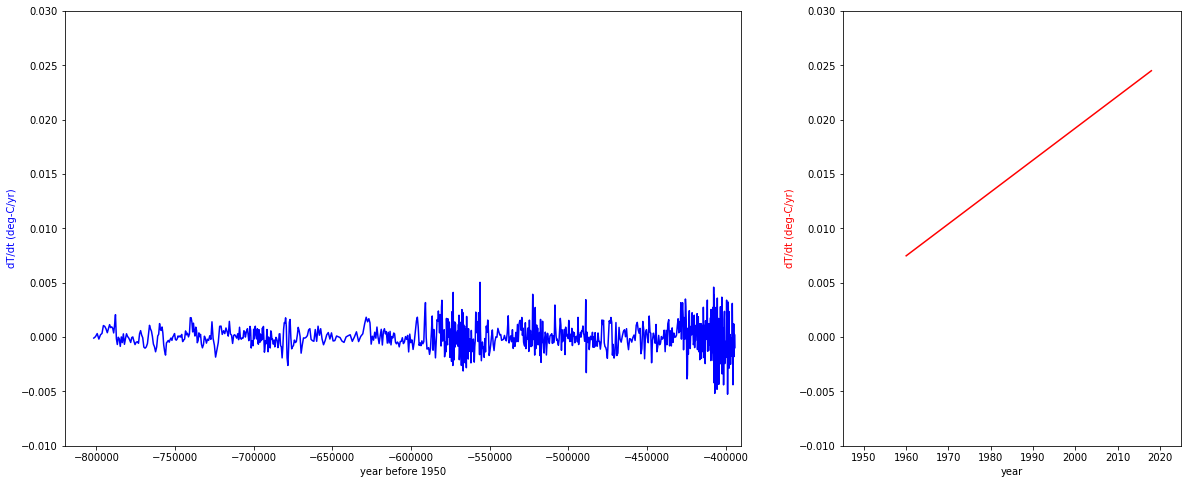

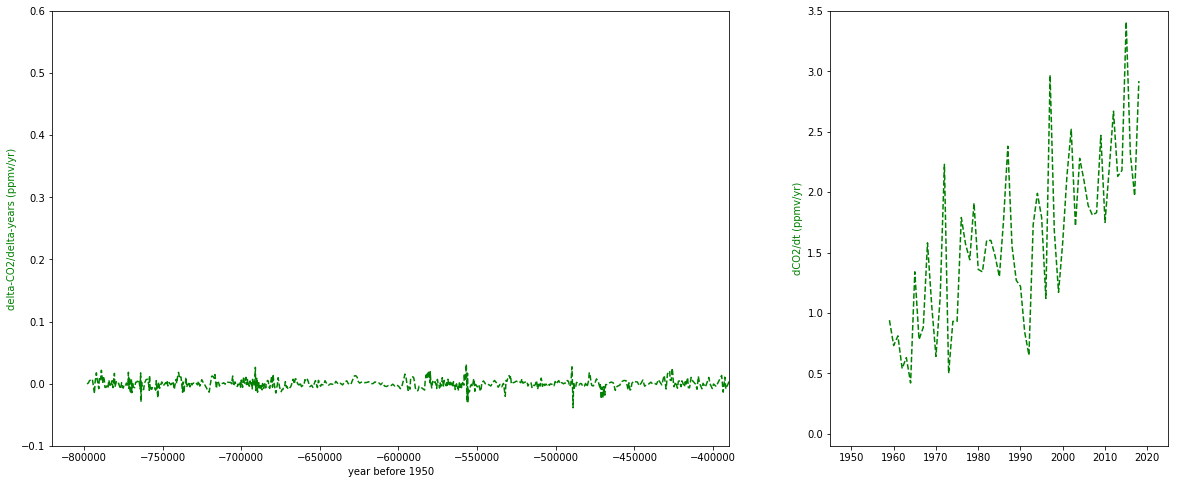

In [83]:
# Use np.diff(a) = a[i+1]-a[i] to calculate derivative

ptmp_age_diff = np.diff(ptmp_age)
ptmp_tmp_diff = np.diff(ptmp_t)
ptmp_deriv = ptmp_tmp_diff/ptmp_age_diff
#print(ptmp_age_diff)
#print(ptmp_tmp_diff)

pco2_age_diff = np.diff(pco2_age)
pco2_ppm_diff = np.diff(pco2_ppm)
pco2_deriv = pco2_ppm_diff/pco2_age_diff
#print(pco2_deriv)

fig2 = plt.figure(2)
# reuse same gs[] ratio from above
ax5 = fig2.add_subplot(gs[0])
ax5.set_xlim(-820000,-390000)
ax5.set_ylim(-0.01,0.03)
ax5.set_xlabel('year before 1950')
ax5.set_ylabel('dT/dt (deg-C/yr)', color='b')
ax5.plot(ptmp_age[-895:],ptmp_deriv[-895:],'b-')
#ax5.plot(ptmp_age[:-1],ptmp_deriv,'g--')

ntmp_deriv = np.diff(poly(ntmp_age[min:]))
ax6 = fig2.add_subplot(gs[1])
ax6.set_xlim(1945,2025)
ax6.set_ylim(-0.01,0.03)
ax6.set_xlabel('year')
ax6.set_ylabel('dT/dt (deg-C/yr)', color='r')
ax6.plot(ntmp_age[min:-1],ntmp_deriv,'r-')

fig3 = plt.figure(3)
ax7 = fig3.add_subplot(gs[0])
ax7.set_xlim(-820000,-390000)
ax7.set_ylim(-0.1,3/5)
ax7.set_xlabel('year before 1950')
ax7.set_ylabel('delta-CO2/delta-years (ppmv/yr)', color='g')
#ax7.set_ylim(0.4,3.5)
ax7.plot(pco2_age[-895:],pco2_deriv[-895:],'g--')

nco2_deriv = np.diff(nco2_ppm)
ax8 = fig3.add_subplot(gs[1])
ax8.set_xlim(1945,2025)
ax8.set_ylim(-0.1,3.5)
ax8.set_ylabel('dCO2/dt (ppmv/yr)', color='g')
ax8.plot(nco2_age[:-1],nco2_deriv,'g--')
